In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
single_static_l, single_force_l, double_force_l = [], [], []
data_dir = "../data/simulated-data"
for filename in os.listdir(data_dir):
    filename = os.fsdecode(filename)
    if filename.startswith("eq") and filename.endswith(".tsv"):
        if "single_static" in filename:
            single_static_l.append(np.loadtxt(os.path.join(data_dir, filename), delimiter="\t"))
        elif "single_force" in filename:
            single_force_l.append(np.loadtxt(os.path.join(data_dir, filename), delimiter="\t"))
        elif "double_force" in filename:
            double_force_l.append(np.loadtxt(os.path.join(data_dir, filename), delimiter="\t"))
single_static = np.vstack(single_static_l)
single_force = np.vstack(single_force_l)
double_force = np.vstack(double_force_l).reshape(single_force.shape[0], 2, -1)  # 2 properties sample

print("Number of single_static data samples: %d" % single_static.shape[0])
print("Number of single_force data samples: %d" % single_force.shape[0])
print("Number of double_force data samples: %d" % double_force.shape[0])

Number of single_static data samples: 10
Number of single_force data samples: 10
Number of double_force data samples: 10


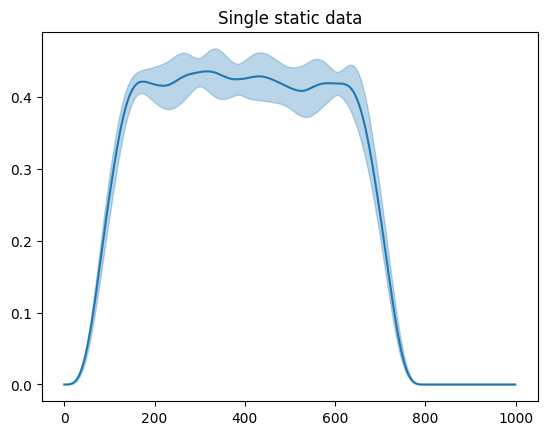

In [6]:
# plot single static
mean_single_static = single_static.mean(axis=0)
std_single_static = single_static.std(axis=0)

plt.plot(mean_single_static)
plt.fill_between(
    np.arange(mean_single_static.shape[0]),
    mean_single_static - std_single_static,
    mean_single_static + std_single_static,
    color="tab:blue",
    alpha=.3
)
plt.title("Single static data")
plt.show()

In [7]:
np.savetxt("%s/mean_single_static.tsv" % data_dir, mean_single_static, delimiter="\t")

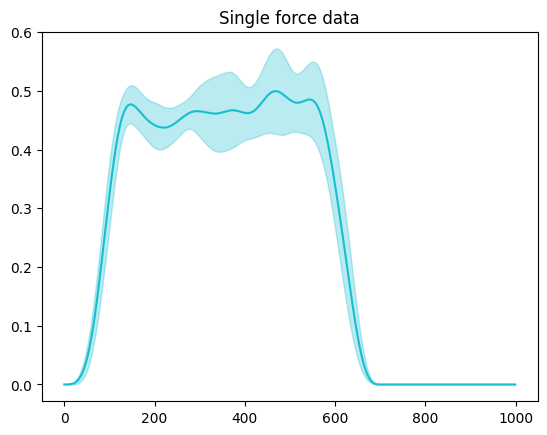

In [13]:
# plot single force
mean_single_force = single_force.mean(axis=0)
std_single_force = single_force.std(axis=0)

plt.plot(mean_single_force, color="tab:cyan")
plt.fill_between(
    np.arange(mean_single_force.shape[0]),
    mean_single_force - std_single_force,
    mean_single_force + std_single_force,
    color="tab:cyan",
    alpha=.3
)
plt.title("Single force data")
plt.show()

In [9]:
np.savetxt("%s/mean_single_force.tsv" % data_dir, mean_single_force, delimiter="\t")

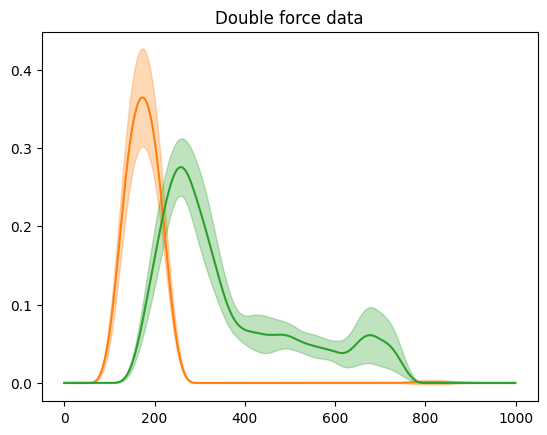

In [15]:
# plot single force
mean_double_force = double_force.mean(axis=0)
std_double_force = double_force.std(axis=0)

plt.plot(mean_double_force[0], color="tab:orange")
plt.plot(mean_double_force[1], color="tab:green")

plt.fill_between(
    np.arange(mean_double_force.shape[1]),
    mean_double_force[0] - std_double_force[0],
    mean_double_force[0] + std_double_force[0],
    color="tab:orange",
    alpha=.3
)

plt.fill_between(
    np.arange(mean_double_force.shape[1]),
    mean_double_force[1] - std_double_force[1],
    mean_double_force[1] + std_double_force[1],
    color="tab:green",
    alpha=.3
)
plt.title("Double force data")
plt.show()

In [17]:
np.savetxt("%s/mean_double_force.tsv" % data_dir, mean_double_force, delimiter="\t")